In [3]:
#| code-fold: true
#| code-summary: Load packages

# numerical calculation & data frames
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

# statistics
import statsmodels.api as sm

# Customizing
- [Seaborn/Customizing the appearance](https://seaborn.pydata.org/tutorial/objects_interface.html#customizing-the-appearance)  
- [Reference](https://seaborn.pydata.org/generated/seaborn.objects.Plot.html)

## Scales and layouts

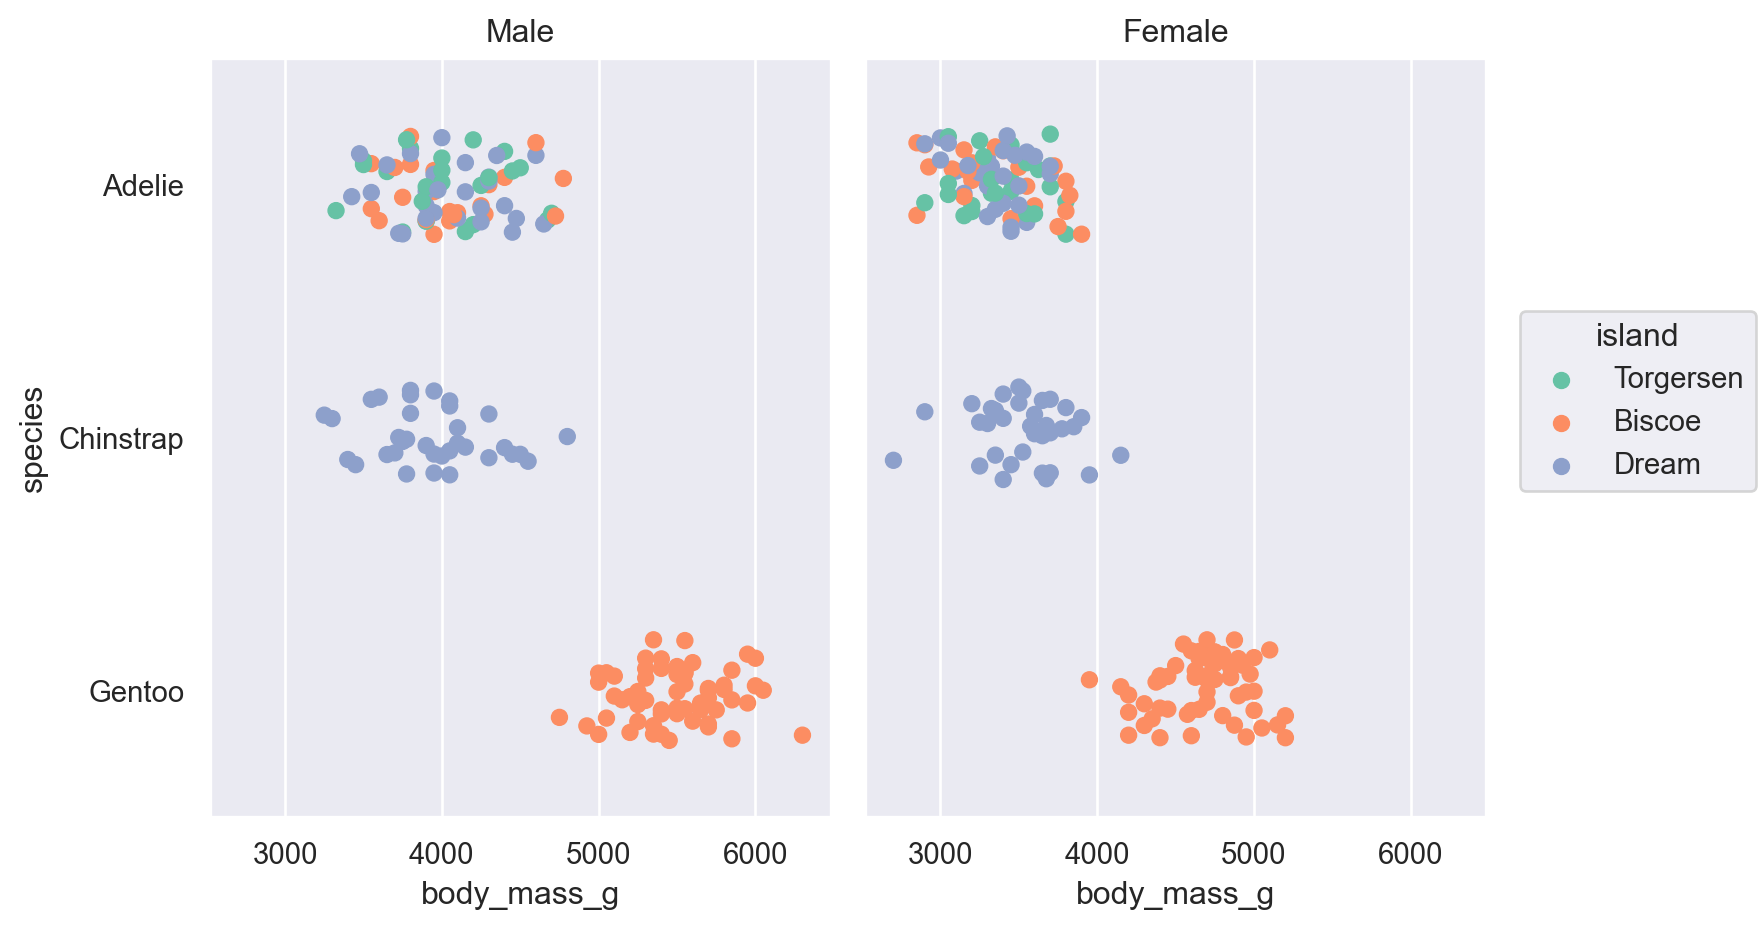

In [4]:
penguins = sns.load_dataset("penguins")

(
    so.Plot(penguins, x="body_mass_g", y="species", color="island")
    .facet(col="sex")
    .add(so.Dot(), so.Jitter(.5))
    .scale(color="Set2")  # color palettes: "Set2"
    .layout(size=(8, 5))  # plot size
)


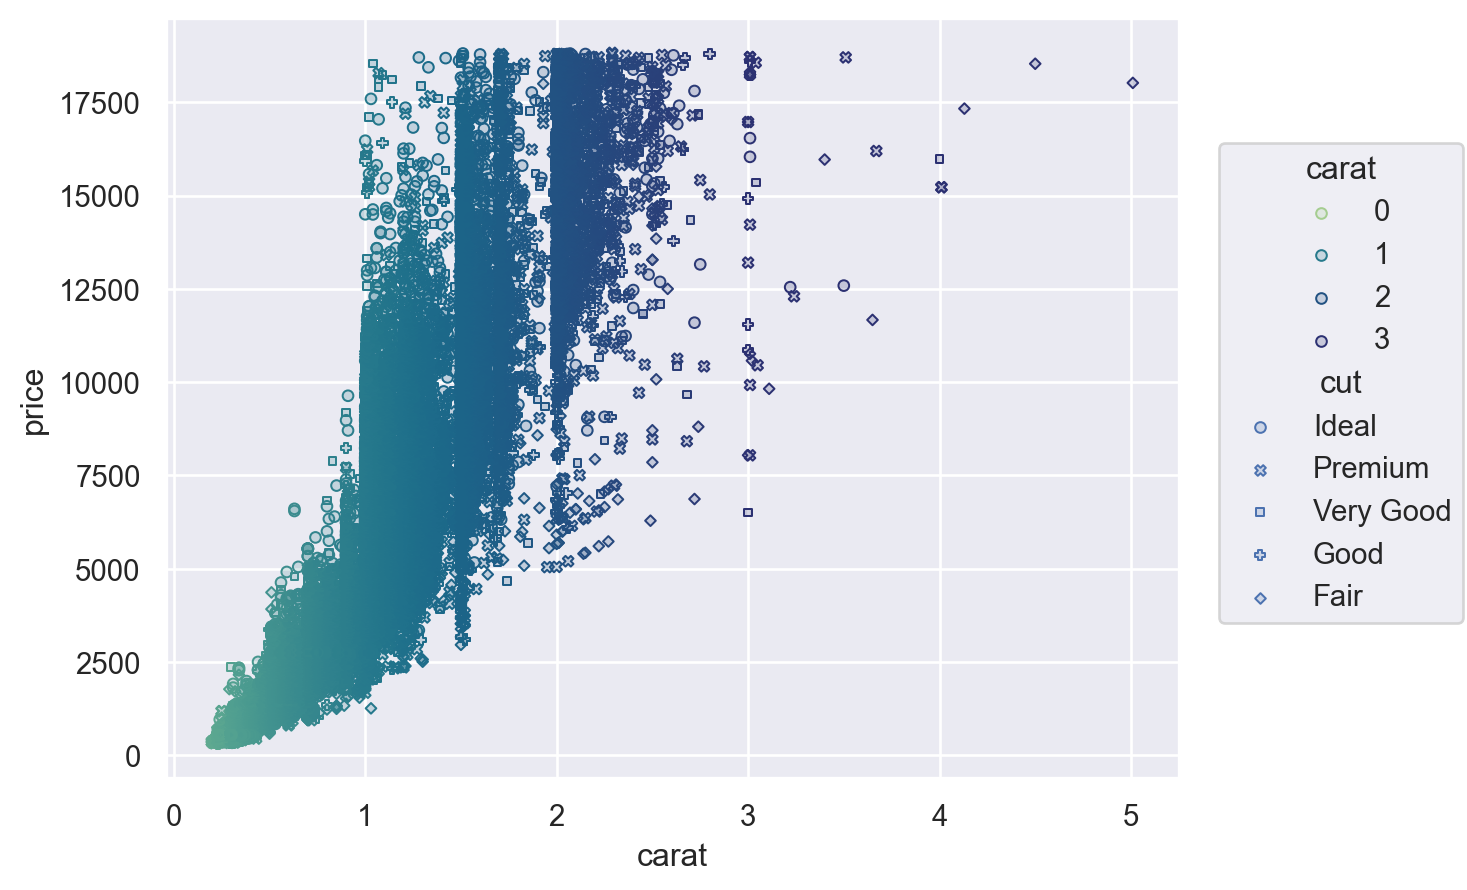

In [2]:
diamonds = sns.load_dataset("diamonds")

(
    so.Plot(diamonds, x="carat", y="price", color="carat", marker="cut")
    .add(so.Dots())
    .scale(
        color=so.Continuous("crest", norm=(0, 3), trans="sqrt"),
    )
)

[Choosing color palettes](https://seaborn.pydata.org/tutorial/color_palettes.html)

## Legends and ticks

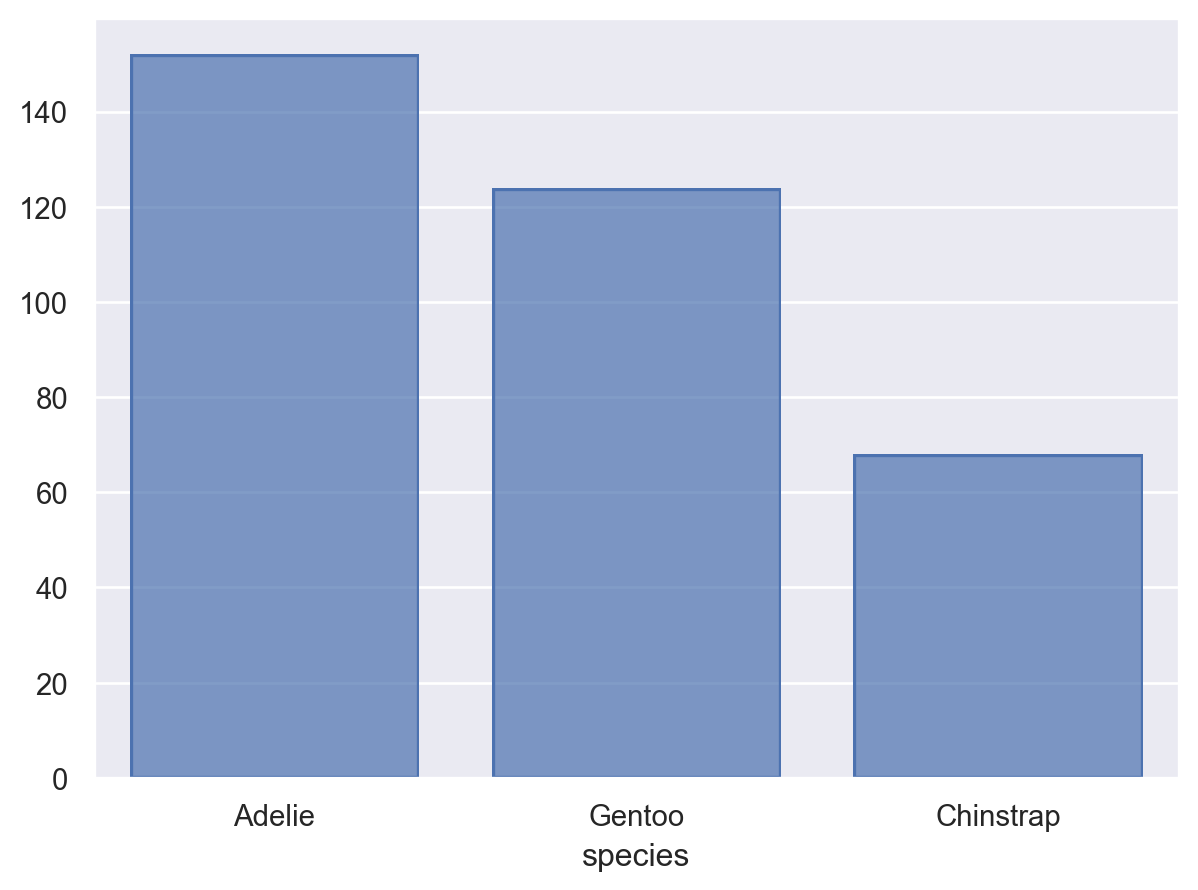

In [13]:
(
    so.Plot(penguins, x="species")
    .add(so.Bar(), so.Count())
    .scale(x=so.Nominal(order=["Adelie", "Gentoo", "Chinstrap"])) # x축의 카테고리 순서를 변경
)

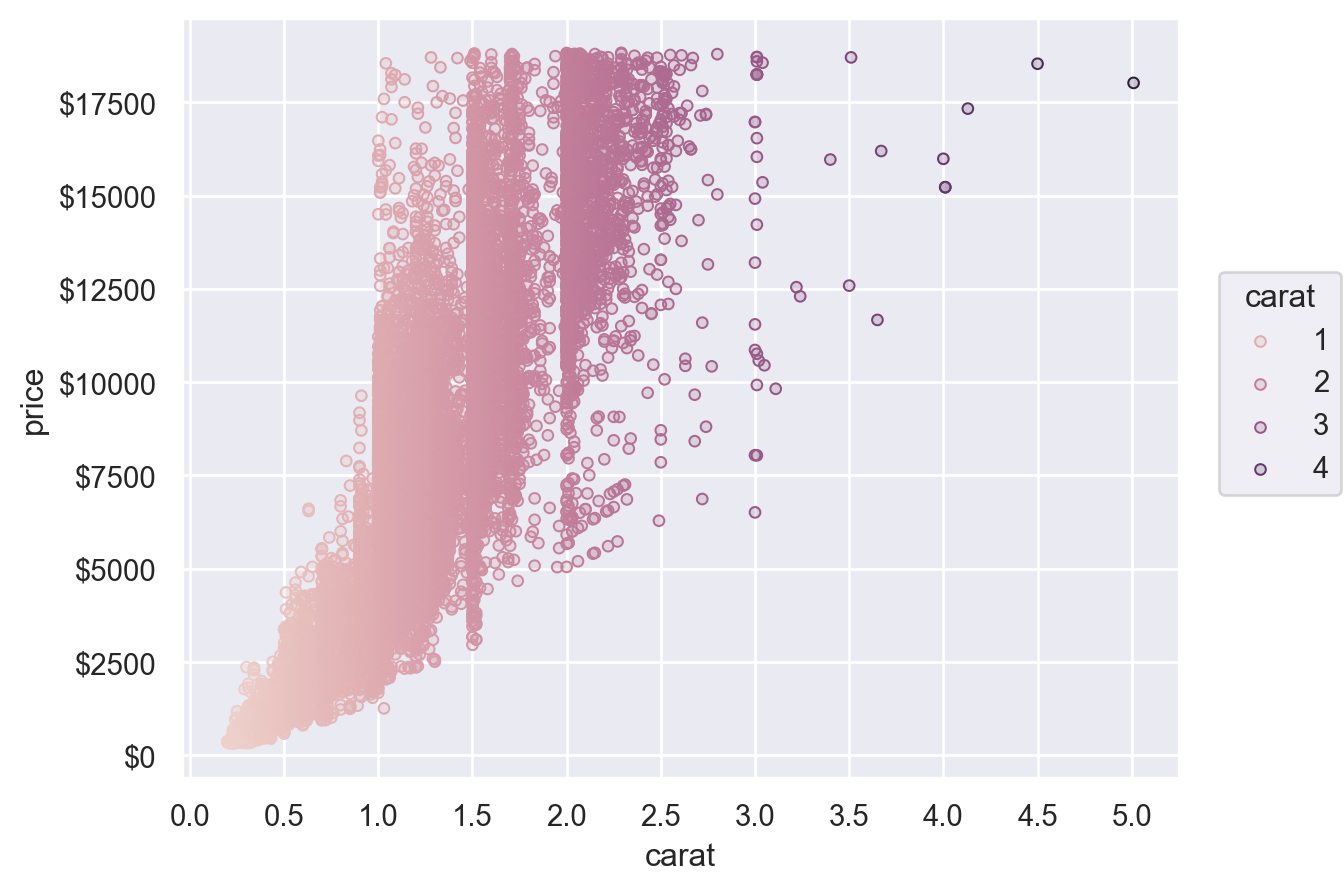

In [3]:
(
    so.Plot(diamonds, x="carat", y="price", color="carat")
    .add(so.Dots())
    .scale(
        x=so.Continuous().tick(every=0.5),
        y=so.Continuous().label(like="${x:.0f}"), # %표시: like="{x:.1%}" 
        color=so.Continuous().tick(at=[1, 2, 3, 4]),
    )
)

## Limits, labels, and titles

Plot has a number of methods for simple customization, including Plot.label(), Plot.limit(), and Plot.share():

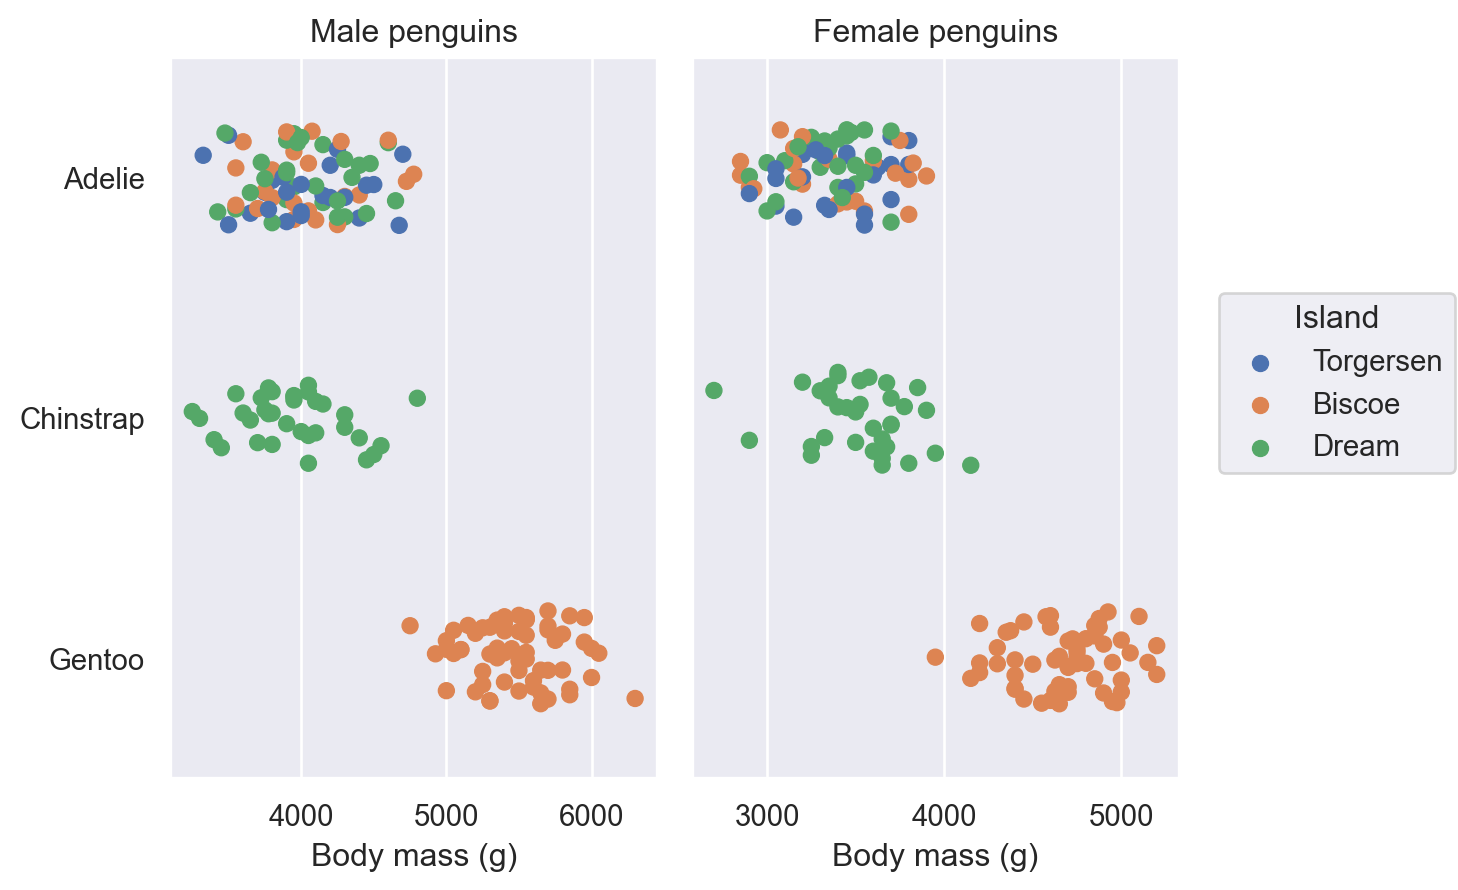

In [4]:
penguins = sns.load_dataset("penguins")

(
    so.Plot(penguins, x="body_mass_g", y="species", color="island")
    .facet(col="sex")
    .add(so.Dot(), so.Jitter(.5))
    .share(x=False)
    .limit(y=(2.5, -.5))
    .label(
        x="Body mass (g)", y="",
        color=str.capitalize,
        title="{} penguins".format,
    )
)

## Themes

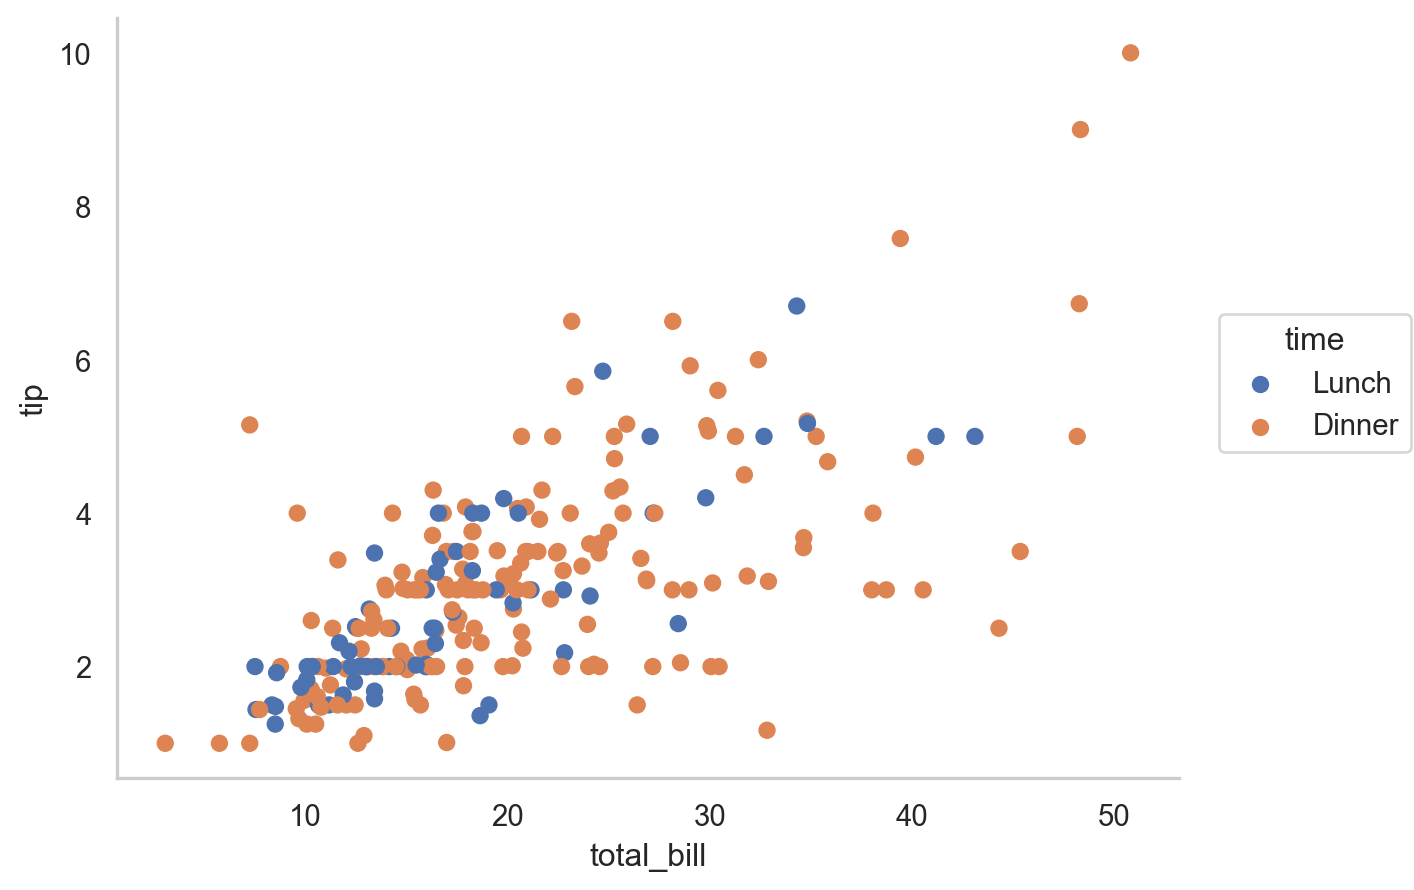

In [20]:
tips = sns.load_dataset("tips")
p = (
    so.Plot(tips, x="total_bill", y="tip", color="time")
    .add(so.Dot())
)
p.theme({"axes.facecolor": "white", 
         "axes.edgecolor": "0.8", 
         'axes.spines.top': False,
         'axes.spines.right': False})

[seaborn.axes_style](https://seaborn.pydata.org/generated/seaborn.axes_style.html)

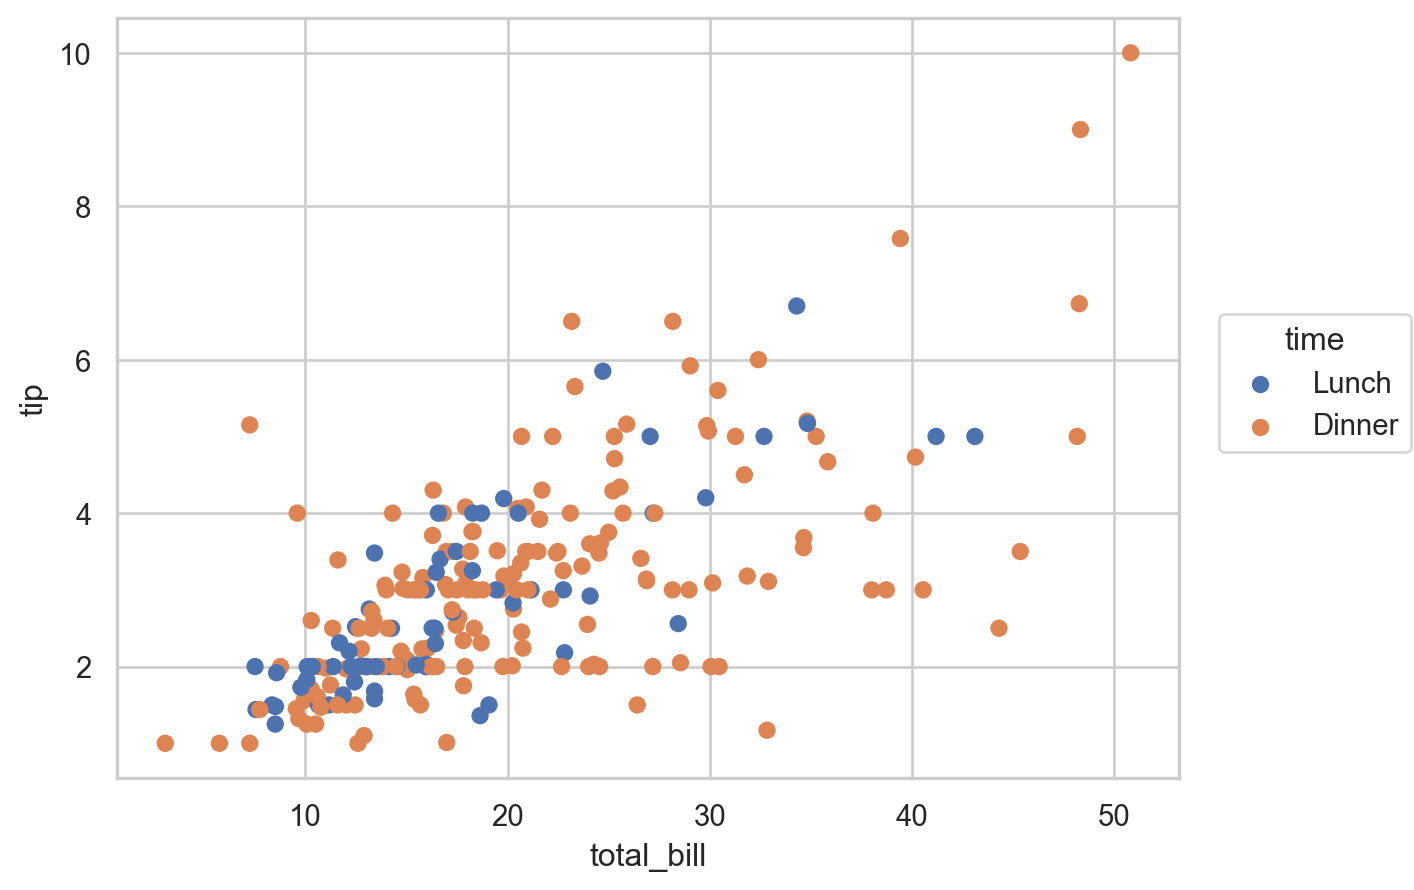

In [16]:
from seaborn import axes_style
p.theme({**axes_style("whitegrid")})

[Seaborn: controlling figure aesthetics](https://seaborn.pydata.org/tutorial/aesthetics.html)

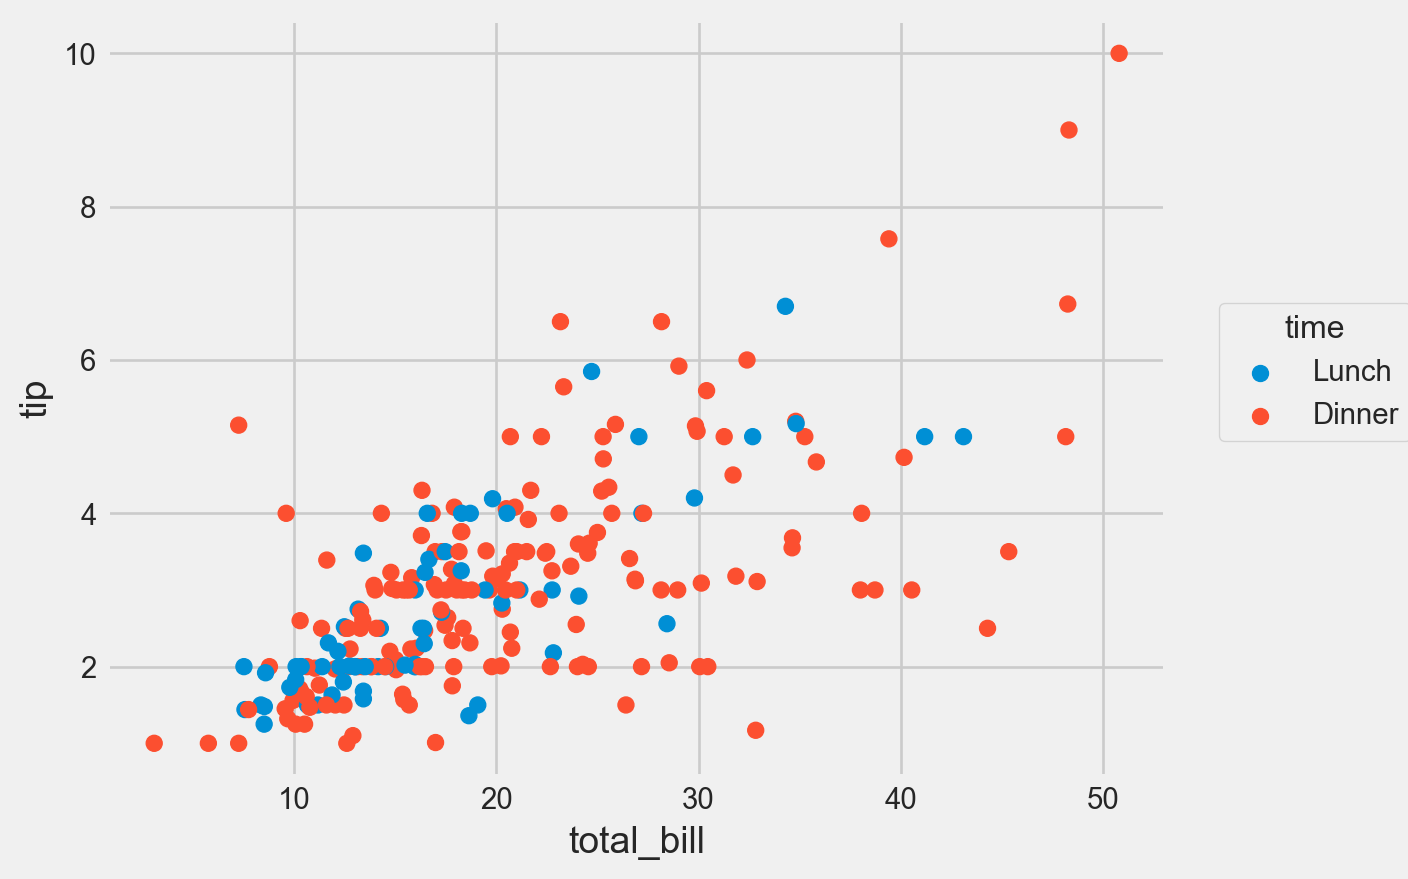

In [13]:
from matplotlib import style
p.theme({**style.library["fivethirtyeight"]})

# Custom plots

sbcustom.py로 working directory에 저장 또는 conda 환경 폴더에 저장

In [1]:
"""
Seaborn.objects statistical plotting custom functions.
boxplot, rangeplot
"""

import seaborn as sns
import seaborn.objects as so


def boxplot(df, x, y, color=None, alpha=0.1, marker="<"):
    
    return (
        so.Plot(df, x=x, y=y, color=color)
        .add(so.Dots(alpha=alpha, color=".6"), so.Jitter(), so.Dodge())
        .add(so.Range(), so.Est("median", errorbar=("pi", 50)), so.Dodge())
        .add(so.Dot(pointsize=8, marker=marker), so.Agg("median"), so.Dodge())
        .scale(color="Dark2")
        .theme({**sns.axes_style("whitegrid")})
    )


def rangeplot(df, x, y, color=None, alpha=0.1):

    return (
        so.Plot(df, x=x, y=y, color=color)
        .add(so.Range(), so.Est("median", errorbar=("pi", 50)), so.Dodge())
        .add(so.Dots(pointsize=8, marker="<"), so.Agg("median"), so.Dodge())
        .scale(color="Dark2")
        .theme({**sns.axes_style("whitegrid")})
    )


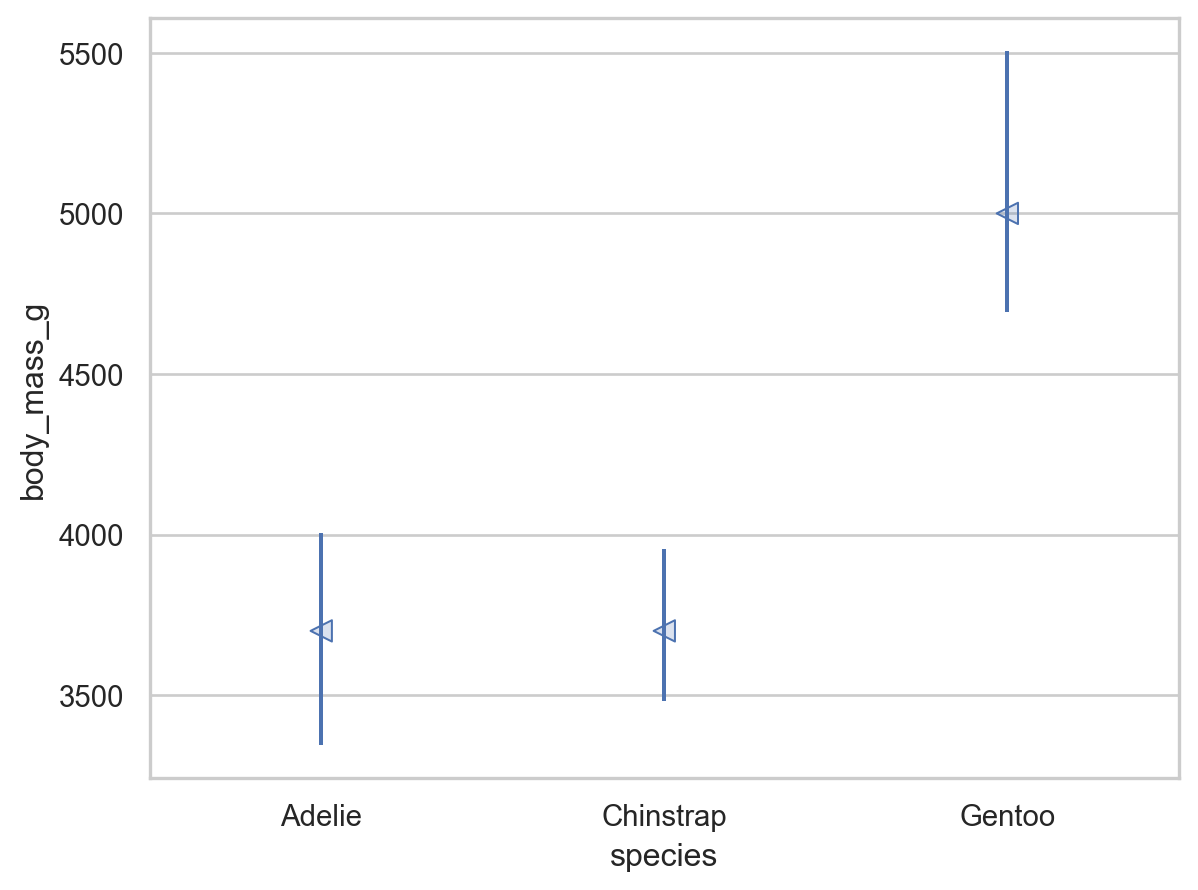

In [10]:
from sbcustom import boxplot, rangeplot
rangeplot(penguins, x="species", y="body_mass_g")

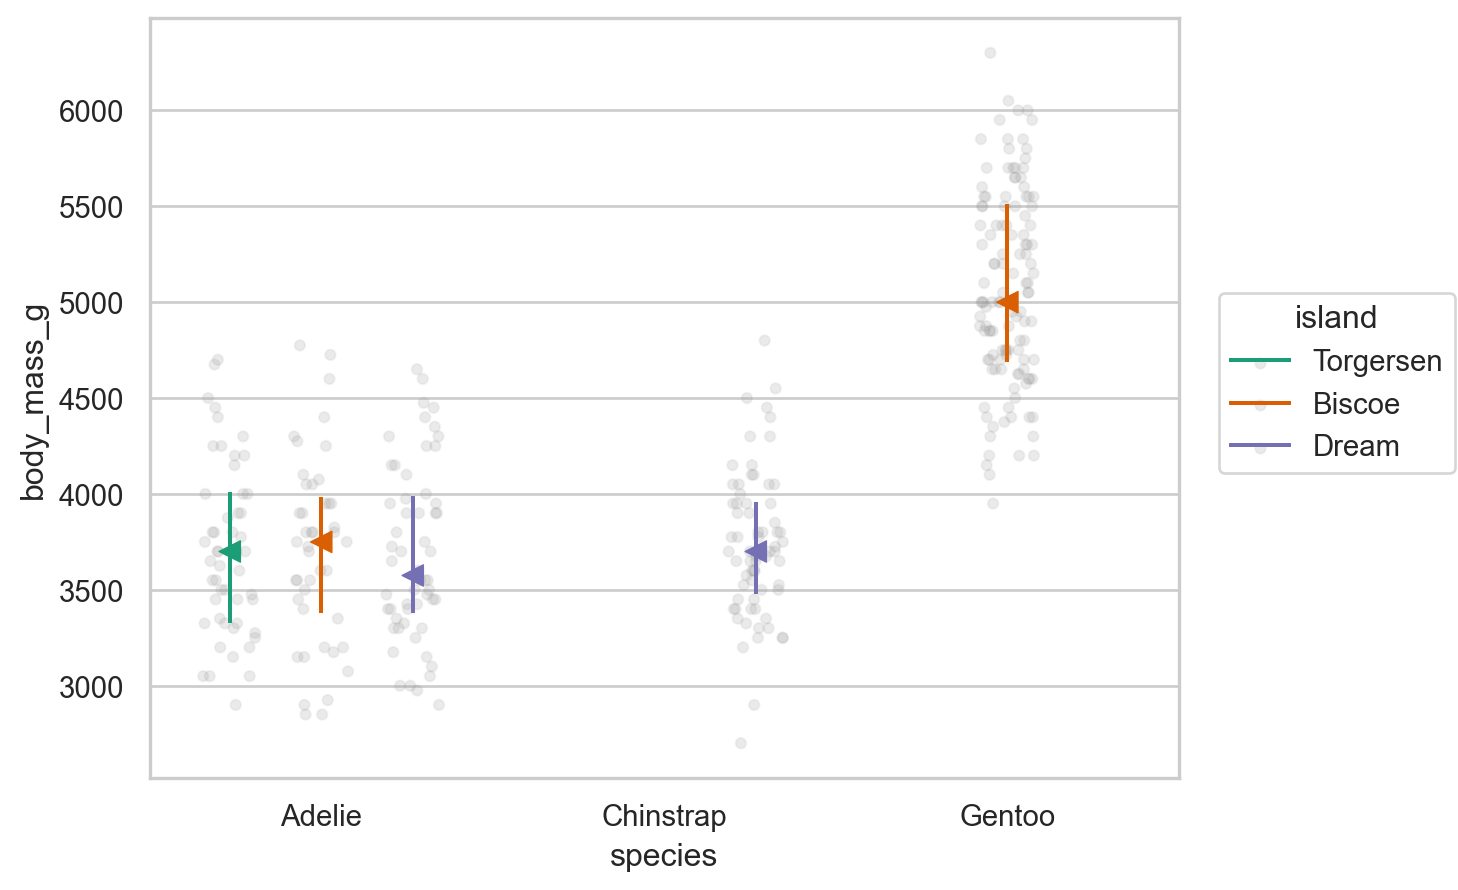

In [11]:
boxplot(penguins, x="species", y="body_mass_g", color="island")

# Snippets
Snippets: Configure User Snippets

In [ ]:
"seaborn.obj": {
		"prefix": "sbj",
		"body": [
			"(",
			"\tso.Plot($1, x='$2', y='$3')",
			"\t.add($0)",
			")",
		],
		"description": "plot seaborn.objects"
	},